<center><h1>Condos.ca Pricing Analysis</h1></center>
<center><h2>Team 8</h2></center>
<br>
<center><img src="https://condos.ca/public/condo_listing/a6/2f/be/01/1b9b734_b537.jpg" width='50%'></center>


### Initial Imports

In [4]:
#Initial Module Imports
from bs4 import BeautifulSoup
import urllib
import re
from time import sleep
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import numpy as np
%matplotlib inline

### Main Scrapper

In [5]:
# Main Scrapper - Functions defined here
# Has search criteria for URL generation
# Initial area_ids of 1 used to obtain major regions' list

area_ids = 1

def soup_generator(i,area_ids):
    condos_full_url_test = 'https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=99999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids%5B%5D=&is_nearby=&view=0&user_search=1&sort=days_on_market'
    condos_base_url = 'https://condos.ca'
    string_con_1 = '/search?for='
    condos_activity = 'sale'
    string_con_2 = '&search_by='
    condos_neighbourhood = 'Neighbourhood'
    string_con_3 = '&buy_min='
    condos_min_price = '300000'#min is 0
    string_con_4 = '&buy_max='
    condos_max_price = '9999999' #max is 99999999
    string_con_5 = '&rent_min='
    condos_min_rent = '1500'
    string_con_6 = '&rent_max='
    condos_max_rent = '2000'
    string_con_7 = '&unit_area_min='
    condos_unit_area_min = '0'
    string_con_8 = '&unit_area_max='
    condos_unit_area_max = '99999999'
    string_con_9 = '&type='
    condos_type = '0'
    string_con_10 = '&beds_min='
    condos_beds_min = '0'
    string_con_11 = '&area_ids='
    condos_area_ids = area_ids
    string_con_12 = '&polygon='
    string_con_13 = '&nh_ids[]'# or '&nh_ids%'
    condos_nh_ids = ''# or '5B%5D'
    string_con_14 = '=&is_nearby='
    curr_page_con = '&page='
    curr_page = i
    string_con_15 = '&view='
    condos_view = '0'
    string_con_16 = '&user_search='
    condos_user_search = '1'
    string_con_17 = '&sort='
    condos_sort_by = 'days_on_market'
    
    # Compile search criteria URL
    condos_search_list = [condos_base_url,string_con_1,condos_activity,string_con_2,condos_neighbourhood,string_con_3,condos_min_price,string_con_4,condos_max_price,string_con_5,condos_min_rent,string_con_6,condos_max_rent,string_con_7,condos_unit_area_min,string_con_8,condos_unit_area_max,string_con_9,condos_type,string_con_10,condos_beds_min,string_con_11,str(condos_area_ids),string_con_12,string_con_13,condos_nh_ids,string_con_14,curr_page_con,str(curr_page),string_con_15,condos_view,string_con_16,condos_user_search,string_con_17,condos_sort_by]
    condos_search_url = ''.join(condos_search_list)
    print(condos_search_url)
    
    # Make soup of search criteria URL
    condos_search_url_request = urllib.request.Request(condos_search_url, headers={'User-Agent': 'Mozilla/5.0'})
    condos_search_url_source = urllib.request.urlopen(condos_search_url_request).read()
    condos_search_soup = BeautifulSoup(condos_search_url_source, 'html.parser')
    return condos_search_soup
    
condos_search_soup = soup_generator(1,area_ids) # Gives the soup for major regions' function

# Find list of values for each major region
def major_region(condos_search_soup):
    major_region_value = condos_search_soup.find_all("option", area = True, value = True)
    major_region_value_dict = {}
    for option in major_region_value:
        major_region_value_dict[option.get_text()]=option['value']
    return major_region_value_dict

major_region_value_dict = major_region(condos_search_soup)
print(major_region_value_dict )
# Now can use major_region_value_dict to iterate and scrap all pages for each region

# Find list of values for each sub region attached to a major region
def minor_region(condos_search_soup, major_region_value_dict):
    minor_region_dict = {}
    for key in major_region_value_dict.keys():
        condos_minor_region = condos_search_soup.findAll('option', under = key.lower())
        if condos_minor_region != None:
            for line in condos_minor_region:
                if not key in minor_region_dict.keys():
                    minor_region_dict[key] = {line.get_text()[3:]:line['value']}
                else: 
                    minor_region_dict[key].update({line.get_text()[3:]:line['value']})
                    
    return minor_region_dict

minor_region_dict = minor_region(condos_search_soup, major_region_value_dict)
print(minor_region_dict)

https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
{'Toronto': '1', 'York Region': '4', 'Peel': '2', 'Halton': '3', 'Durham': '5', 'Hamilton': '599', 'Vancouver': '619', 'North Vancouver City': '612', 'North Vancouver District': '613', 'West Vancouver': '620', 'Burnaby': '652', 'Richmond': '617', 'New Westminster': '611', 'Port Moody': '616'}
{'Toronto': {'Downtown': '590', 'Midtown': '597', 'North York': '593', 'East End': '596', 'East York': '598', 'West End': '595', 'York Crosstown': '594', 'Etobicoke': '592', 'Scarborough': '591'}, 'Peel': {'Brampton': '43', 'Mississauga': '44'}, 'Halton': {'Milton': '45', 'Burlington': '46', 'Halton Hills': '47', 'Oakville': '48'}, 'Vancouver': {'Central': '624', 'East Side': '625', 'West Side': '626', 'South Vancouver': '627'}}


In [6]:
# Define page counter function for specified search

def page_counter(condos_search_soup): # Find total pages in search query
    
    condos_search_current_page_total = condos_search_soup.find("span", {"class":"search_results_range"}).get_text()
    search_current_page_range = condos_search_current_page_total.split()
    search_current_page_range_split = search_current_page_range[0].split("-")
    search_current_page_range_top = int(search_current_page_range_split[1])
    print('Current Page Max Range:', search_current_page_range_top)

    condos_search_all_page_total_source = condos_search_soup.find("span",{"class":"search_results_total"}).get_text()
    condos_search_all_page_total = int(condos_search_all_page_total_source.split()[0])
    print('Full Page Range:', condos_search_all_page_total)

    condos_num_pages = math.ceil(condos_search_all_page_total/search_current_page_range_top)
    sleep(1)
    return condos_num_pages

def full_region_scanner(condos_num_pages,area_ids): # Scans all pages from specified region
    
    page_count = 0
    price_lister = []
    
    for i in range(1,condos_num_pages+1):
        condos_search_soup = soup_generator(i,area_ids)

        # Finding prices on one page
        condos_page_prices_source = condos_search_soup.find(id = 'listing-tab').findAll('span',{'class':'teal'})
        condos_page_prices = [prices.get_text()[1:] for prices in condos_page_prices_source]
        if(len(condos_page_prices)!=0):
            for prices in condos_page_prices:
                each_price = prices.replace(",","")
                if(each_price.isdigit()):
                    price_lister.append(int(each_price))
                    #print(each_price)
        #sleep(1)
        else:
            condos_page_tag_prices_source = condos_search_soup.find(id = 'listing-tab').findAll('span',{'class':'tag-price'})
            condos_page_prices_source_size = condos_search_soup.find(id = 'listing-tab').findAll('div',{'class':'listing-size-div'})
            condos_page_tag_prices = [tag_prices.get_text().strip()[1:] for tag_prices in condos_page_tag_prices_source]
            condos_page_sizes = [sizes.get_text().strip() for sizes in condos_page_prices_source_size]
            
            for i in range(0,len(condos_page_tag_prices)):
                tag_price_replaced = condos_page_tag_prices[i].replace(",","")
                size = condos_page_sizes[i]
                if(len(size.split("-"))==2):
                    size = (int(size.split("-")[0]) + int(size.split("-")[1]))/2 
                if((tag_price_replaced.isdigit()) and (size != "0")):
                    each_price = int(tag_price_replaced)/int(size)
                    price_lister.append(int(each_price))
                    #print(i, each_price)
            
        page_count += 1
        print('Finished analyzing page:', page_count)
    print('Price list:',price_lister)
    return price_lister

In [7]:
# Iterate through major regions
regional_price_store = {}
regional_avg_pricing = {}
regional_median_pricing = {}
for key,region in major_region_value_dict.items():
    condos_search_soup = soup_generator(1,region)
    condos_num_pages = page_counter(condos_search_soup) # Gives first page of region so can find pages
    print('Pages to analyse:',condos_num_pages,'for region:',key)
    price_lister = full_region_scanner(condos_num_pages,region)
    
    if(len(price_lister) != 0):
        regional_price_store[key] = price_lister
        avg_price = sum(price_lister)/len(price_lister)
        regional_avg_pricing[key] = avg_price
        median_price = statistics.median(price_lister)
        regional_median_pricing[key] = median_price

print('The average price per region is:', regional_avg_pricing)
print('The median price per region is:', regional_median_pricing)

https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Current Page Max Range: 45
Full Page Range: 1806
Pages to analyse: 41 for region: Toronto
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=3

Finished analyzing page: 28
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids[]=&is_nearby=&page=29&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 29
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids[]=&is_nearby=&page=30&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 30
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=1&polygon=&nh_ids[]=&is_nearby=&page=31&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 31
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_mi

Current Page Max Range: 45
Full Page Range: 617
Pages to analyse: 14 for region: York Region
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=4&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=4&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=4&polygon=&nh_ids[]=&is_nearby=&page=3&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 3
https://condos.ca/search?for=sale&sea

Finished analyzing page: 7
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=2&polygon=&nh_ids[]=&is_nearby=&page=8&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 8
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=2&polygon=&nh_ids[]=&is_nearby=&page=9&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 9
Price list: [324, 358, 437, 503, 304, 481, 511, 461, 441, 281, 298, 436, 518, 517, 499, 662, 285, 702, 594, 380, 476, 398, 416, 448, 535, 556, 519, 369, 408, 477, 370, 419, 428, 338, 528, 605, 350, 409, 536, 495, 622, 337, 519, 406, 574, 608, 450, 342, 572, 486, 510, 248, 553, 333, 657, 368, 432, 384, 655, 602, 563, 521, 618, 651, 412, 411, 386, 576, 367, 562, 447, 643, 386, 556, 425, 600, 

Finished analyzing page: 7
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=619&polygon=&nh_ids[]=&is_nearby=&page=8&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 8
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=619&polygon=&nh_ids[]=&is_nearby=&page=9&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 9
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=619&polygon=&nh_ids[]=&is_nearby=&page=10&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 10
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_m

Current Page Max Range: 45
Full Page Range: 84
Pages to analyse: 2 for region: North Vancouver City
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=612&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=612&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
Price list: [641, 878, 764, 1016, 821, 1087, 1373, 1189, 1408, 1255, 812, 1085, 648, 892, 690, 852, 583, 699, 657, 594, 928, 829, 523, 1235, 684, 729, 674, 485, 670, 953, 864, 908, 1086, 1349, 706, 1165, 908, 748, 962, 785, 829, 786, 1004, 978, 852, 1273, 1096, 598, 1909, 2337, 864, 1244, 1020, 839, 824, 951, 888, 

Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=617&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=617&polygon=&nh_ids[]=&is_nearby=&page=3&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 3
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=617&polygon=&nh_ids[]=&is_nearby=&page=4&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 4
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min

Current Page Max Range: 41
Full Page Range: 41
Pages to analyse: 1 for region: Port Moody
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=616&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
Price list: [673, 633, 1305, 996, 653, 858, 718, 890, 311, 870, 619, 882, 720, 700, 717, 674, 513, 556, 567, 684, 697, 767, 837, 731, 918, 697, 670, 1029, 820, 425, 441, 378, 383, 402, 747, 740, 465, 462, 968, 510, 1041]
The average price per region is: {'Toronto': 773.1491677336747, 'York Region': 601.0980926430518, 'Peel': 456.80887372013655, 'Halton': 617.4591836734694, 'Durham': 431.4, 'Hamilton': 475.77777777777777, 'Vancouver': 1274.7240757439135, 'North Vancouver City': 927.4404761904761, 'North Vancouver District': 774.2133333333334, 'West Vancouver': 1212.7073170731708, 'Burnaby': 785.1294964028777, 'R

In [9]:
# Iterate through minor regions

minor_region_price_store = {}
minor_region_avg_pricing = {}
minor_region_median_pricing = {}
for key, pair in minor_region_dict.items():
    for minor, value in pair.items():
        condos_search_soup = soup_generator(1,value)
        condos_num_pages = page_counter(condos_search_soup) # Gives first page of region so can find pages
        print('Pages to analyse:',condos_num_pages,'for sub-region:', minor)
        price_lister = full_region_scanner(condos_num_pages, value)
        print(len(price_lister))
        # This creates a dictionary with major regions as keys and {minor:pricing data} as values
        if(len(price_lister) != 0):
            if not key in minor_region_price_store.keys(): # for storing all prices per minor region per major region
                minor_region_price_store[key] = {minor:price_lister}
            else:
                minor_region_price_store[key].update({minor:price_lister})
        
        # For average pricing per sub-region
            avg_price = sum(price_lister)/len(price_lister)
            if not key in minor_region_avg_pricing.keys():
                minor_region_avg_pricing[key] = {minor:avg_price}
            else:
                minor_region_avg_pricing[key].update({minor:avg_price})
            
        # For median pricing per sub-region
            median_price = statistics.median(price_lister)
            if not key in minor_region_median_pricing.keys():
                minor_region_median_pricing[key] = {minor:median_price}
            else:
                minor_region_median_pricing[key].update({minor:median_price})
#print(minor_region_avg_pricing)

https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=590&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Current Page Max Range: 45
Full Page Range: 618
Pages to analyse: 14 for sub-region: Downtown
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=590&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=590&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
https://condos.ca/search?for=sale&search_by=Neighbourhood

Finished analyzing page: 2
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=597&polygon=&nh_ids[]=&is_nearby=&page=3&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 3
Price list: [771, 559, 858, 583, 864, 884, 1017, 689, 1122, 944, 860, 774, 938, 841, 878, 700, 977, 1054, 885, 803, 945, 867, 910, 578, 948, 829, 984, 775, 922, 905, 971, 853, 857, 918, 906, 1037, 824, 827, 934, 951, 973, 1020, 842, 752, 669, 809, 900, 1002, 945, 876, 923, 850, 1047, 681, 936, 1319, 980, 1231, 3738, 817, 1017, 915, 867, 996, 1056, 977, 944, 1201, 1089, 1042, 992, 774, 1264, 718, 665, 894, 2098, 883]
78
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=593&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_

Current Page Max Range: 45
Full Page Range: 76
Pages to analyse: 2 for sub-region: West End
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=595&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=595&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
Price list: [848, 680, 868, 897, 724, 420, 842, 843, 568, 526, 790, 1044, 624, 573, 702, 687, 826, 1057, 949, 800, 581, 720, 835, 724, 868, 997, 798, 771, 910, 858, 745, 798, 527, 848, 887, 1023, 892, 894, 806, 1025, 855, 970, 1137, 841, 811, 860, 939, 766, 774, 710, 670, 670, 993, 948, 649, 908, 830, 830, 889, 875, 978, 6

Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=43&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
Price list: [304, 281, 298, 285, 380, 369, 338, 350, 495, 337, 519, 574, 342, 248, 432, 403, 483, 311, 372, 236, 286, 343, 473, 300, 315, 297, 538, 332, 328, 478, 303, 326, 279, 275, 517, 339, 431, 370, 354, 292, 281, 275, 320, 352, 299, 309, 343, 271, 302, 273, 280, 288, 304, 556, 281, 297, 284, 300, 265, 276, 312, 327]
62
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=44&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Current Page Max Range: 45
Full Page Range: 308
Pages to analyse: 7 for sub-region: Mississa

Current Page Max Range: 45
Full Page Range: 446
Pages to analyse: 10 for sub-region: Central
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=624&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=624&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=624&polygon=&nh_ids[]=&is_nearby=&page=3&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 3
https://condos.ca/search?for=sa

Current Page Max Range: 45
Full Page Range: 287
Pages to analyse: 7 for sub-region: West Side
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=626&polygon=&nh_ids[]=&is_nearby=&page=1&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 1
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=626&polygon=&nh_ids[]=&is_nearby=&page=2&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 2
https://condos.ca/search?for=sale&search_by=Neighbourhood&buy_min=300000&buy_max=9999999&rent_min=1500&rent_max=2000&unit_area_min=0&unit_area_max=99999999&type=0&beds_min=0&area_ids=626&polygon=&nh_ids[]=&is_nearby=&page=3&view=0&user_search=1&sort=days_on_market
Finished analyzing page: 3
https://condos.ca/search?for=s

### Visualization of Data

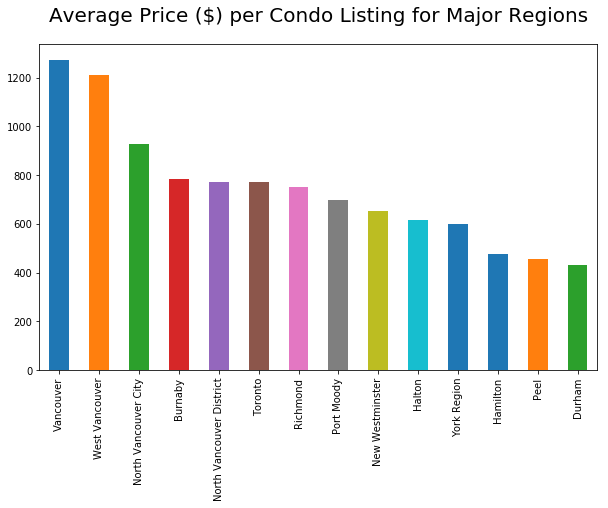

In [10]:
# Plot major regions' average price per listing ($)

regional_avg_pricing_pdseries = pd.Series(regional_avg_pricing)
avg_fig = regional_avg_pricing_pdseries.sort_values(ascending=False).plot(figsize = (10,6),kind='bar')

avg_fig.set_title('Average Price ($) per Condo Listing for Major Regions',fontsize=20)
tt = avg_fig.title
tt.set_position([0.5,1.05])
avg_fig

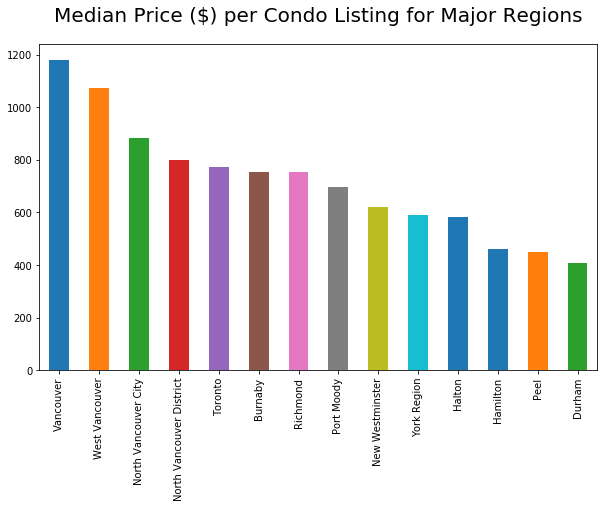

In [11]:
# Plot major regions' median price per listing ($)

regional_median_pricing_pdseries = pd.Series(regional_median_pricing)
median_fig = regional_median_pricing_pdseries.sort_values(ascending=False).plot(figsize=(10,6),kind='bar')
                                                                                
median_fig.set_title('Median Price ($) per Condo Listing for Major Regions',fontsize=20)
tt2 = median_fig.title
tt2.set_position([0.5,1.05])
median_fig

In [12]:
# apply t test to determine if the difference between avg and median prices is significant
x = [float(v) for k, v in regional_avg_pricing.items()]
y = [float(v) for k, v in regional_median_pricing.items()]
stats.ttest_ind(x, y)

Ttest_indResult(statistic=0.31932027547307956, pvalue=0.7520351926728354)

Text(0.5,1.03,'Average Price ($) of Condos within Sub-Regions')

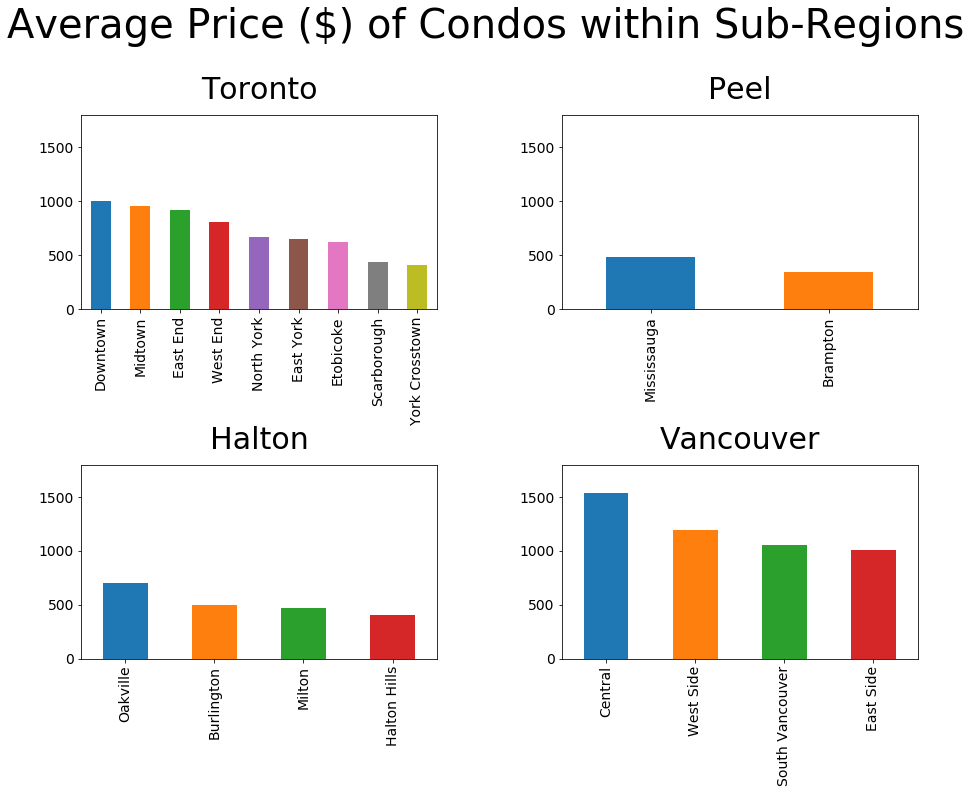

In [13]:
# Plot all subregions and compare average pricing per condo ($)

col_rows = math.ceil(math.sqrt(len(minor_region_avg_pricing)))
col_cols = col_rows
x = 0
y = 0
fig_x_size = 15
fig_y_size = 10
fig_label_size = 14
fig, axes = plt.subplots(nrows=col_rows,ncols=col_cols)
plt.subplots_adjust(hspace=0.8,wspace=0.35)
for major, pair in minor_region_avg_pricing.items():
    if x > col_rows-1:
        x = 0
        y += 1
        td = pd.Series(pair).sort_values(ascending = False).plot(kind='bar', figsize = (fig_x_size,fig_y_size), ax=axes[x,y], ylim=(0,1800))
        td.set_title(major, fontsize=30)
        (td.title).set_position([0.5,1.05])
        plt.ylabel('test',fontsize=20)
        plt.sca(axes[x,y])
        plt.tick_params(axis='both', which='major', labelsize=fig_label_size)
    if y > col_cols-1:
        y = 0
        x += 1
        td = pd.Series(pair).sort_values(ascending = False).plot(kind='bar', figsize = (fig_x_size,fig_y_size), ax=axes[x,y], ylim=(0,1800))
        td.set_title(major, fontsize=30)
        (td.title).set_position([0.5,1.05])
        plt.sca(axes[x,y])
        plt.tick_params(axis='both', which='major', labelsize=fig_label_size)
    td = pd.Series(pair).sort_values(ascending = False).plot(kind='bar', figsize = (fig_x_size,fig_y_size), ax=axes[x,y], ylim=(0,1800))
    td.set_title(major, fontsize=30)
    (td.title).set_position([0.5,1.05])
    plt.sca(axes[x,y])
    plt.tick_params(axis='both', which='major', labelsize=fig_label_size)
    y += 1
fig.suptitle('Average Price ($) of Condos within Sub-Regions', fontsize=40, y = 1.03)

Text(0.5,1.03,'Median Price ($) of Condos within Sub-Regions')

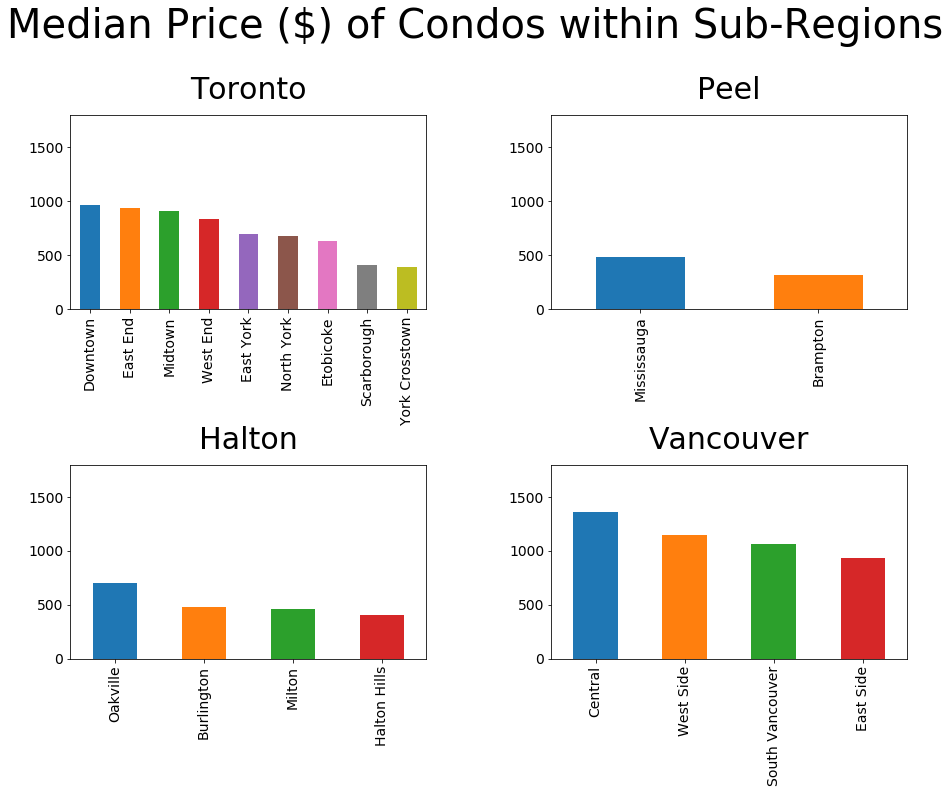

In [14]:
# Plot all subregions and compare median pricing per condo ($)

col_rows = math.ceil(math.sqrt(len(minor_region_median_pricing)))
col_cols = col_rows
x = 0
y = 0
fig_x_size = 15
fig_y_size = 10
fig_label_size = 14
fig, axes = plt.subplots(nrows=col_rows,ncols=col_cols)
plt.subplots_adjust(hspace=0.8,wspace=0.35)
for major, pair in minor_region_median_pricing.items():
    if x > col_rows-1:
        x = 0
        y += 1
        td = pd.Series(pair).sort_values(ascending = False).plot(kind='bar', figsize = (fig_x_size,fig_y_size), ax=axes[x,y], ylim=(0,1800))
        td.set_title(major, fontsize=30)
        (td.title).set_position([0.5,1.05])
        plt.ylabel('test',fontsize=20)
        plt.sca(axes[x,y])
        plt.tick_params(axis='both', which='major', labelsize=fig_label_size)
    if y > col_cols-1:
        y = 0
        x += 1
        td = pd.Series(pair).sort_values(ascending = False).plot(kind='bar', figsize = (fig_x_size,fig_y_size), ax=axes[x,y], ylim=(0,1800))
        td.set_title(major, fontsize=30)
        (td.title).set_position([0.5,1.05])
        plt.sca(axes[x,y])
        plt.tick_params(axis='both', which='major', labelsize=fig_label_size)
    td = pd.Series(pair).sort_values(ascending = False).plot(kind='bar', figsize = (fig_x_size,fig_y_size), ax=axes[x,y], ylim=(0,1800))
    td.set_title(major, fontsize=30)
    (td.title).set_position([0.5,1.05])
    plt.sca(axes[x,y])
    plt.tick_params(axis='both', which='major', labelsize=fig_label_size)
    y += 1
fig.suptitle('Median Price ($) of Condos within Sub-Regions', fontsize=40, y = 1.03)

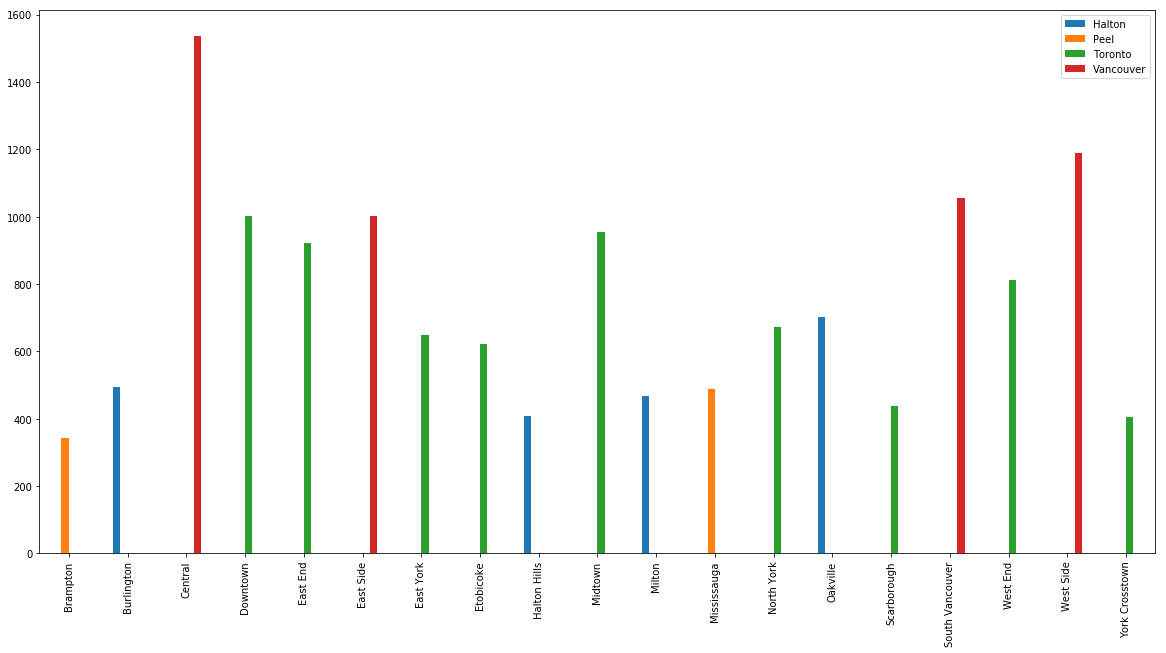

In [15]:
# To test further to have all pricing on one graph

pd.DataFrame(minor_region_avg_pricing).plot(kind='bar', figsize = (20,10))
